In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets

In [2]:
df_raw = datasets.load_diabetes()

In [3]:
df_raw

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
X = df_raw.data
Y = df_raw.target

In [5]:
X.shape,Y.shape

((442, 10), (442,))

In [6]:
df = pd.DataFrame(X)

In [7]:
df.columns = df_raw.feature_names
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


### Since we want to deal with a single feature we have to consider only one column

In [8]:
for columns in df:
    print(columns)
    print(np.corrcoef(df[columns],Y))

age
[[1.         0.18788875]
 [0.18788875 1.        ]]
sex
[[1.       0.043062]
 [0.043062 1.      ]]
bmi
[[1.         0.58645013]
 [0.58645013 1.        ]]
bp
[[1.         0.44148385]
 [0.44148385 1.        ]]
s1
[[1.         0.21202248]
 [0.21202248 1.        ]]
s2
[[1.         0.17405359]
 [0.17405359 1.        ]]
s3
[[ 1.         -0.39478925]
 [-0.39478925  1.        ]]
s4
[[1.         0.43045288]
 [0.43045288 1.        ]]
s5
[[1.         0.56588343]
 [0.56588343 1.        ]]
s6
[[1.         0.38248348]
 [0.38248348 1.        ]]


### since bmi and target value has the highest value of corrleation coefficient so we are gonna proceed with bmi column

In [9]:
df1 = df.loc[:,['bmi']]

In [10]:
df1
y = pd.DataFrame(Y)
y

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Split the data into train and test

In [11]:
from sklearn import model_selection
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(df1,y)

In [12]:
X_train.shape,X_test.shape

((331, 1), (111, 1))

In [13]:
(X_train*2).sum()
lamda = pd.DataFrame(Y_train)
lamda
Y_train.columns = ["bmi"]
X_train - Y_train

,bmi
197,-128.996506
170,-47.020218
1,-75.051474
341,-262.940459
313,-162.946926
...,...
182,-137.994350
273,-241.020218
0,-150.938304
191,-178.041774


X_train.shape

In [14]:

li = []
li.append((Y_train - X_train).sum()["bmi"])
li

[49635.46008676168]

### Loss function with respect to slope

In [15]:
## le the intercept be equals 0
slope = np.arange(-2000,5000,1)
c = 0
li = []
for ele in slope:
#     alpha = (Y_train - (ele*X_train))
#     print(alpha)
    loss_func = ((Y_train - (ele*X_train))**2).sum()["bmi"]
    loss_func = (loss_func/X_train.shape[0])   
    li.append(loss_func)
    

### Graph of loss function wrt slope

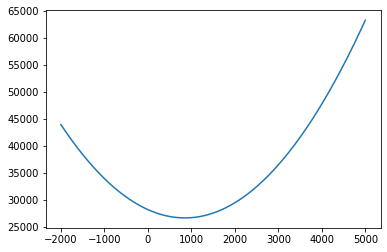

In [16]:
from matplotlib import pyplot as plt
plt.plot(slope,li)

### Loss Function wrt intercept

In [17]:
## le the slope be equals 1
intercept = np.arange(-5000,5000,1)
m = 1
li = []
for ele in intercept:
#     alpha = (Y_train - (ele*X_train))
#     print(alpha)
    loss_func = ((Y_train - ((m*X_train) + ele))**2).sum()["bmi"]
    loss_func = (loss_func/X_train.shape[0])   
    li.append(loss_func)
    

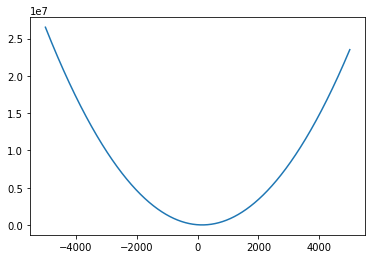

In [18]:
from matplotlib import pyplot as plt
plt.plot(intercept,li)

## Lets create the Gradient Discent Algorithm

In [19]:
# method to calculate loss

def loss(m,c):
    loss_func = 0
    loss_func = ((Y_train - ((m*X_train) + c))**2).sum()["bmi"]
    loss_func = (loss_func/X_train.shape[0]) 
    return loss_func

# method for step counter

def step_counter(m,c,alpha, boolean):
#     m_slope = 0
#     c_slope = 0
    # we want to stop when the values of both m_slope and c_slope becomes less than 0.0001
    
    
    m_slope = (2*(Y_train - (m*X_train + c))*(-m)).sum()["bmi"]
    m_slope = m_slope/X_train.shape[0]
  
    if abs(m_slope) > 0.0001:
       
        m_new = m - (alpha)*(m_slope)
        
    else:
        m_new = m
    
    c_slope = (2*(Y_train - (m*X_train + c))*(-1)).sum()["bmi"]
    c_slope = c_slope/X_train.shape[0]
    if abs(c_slope) > 0.0001:
       
        c_new = c - (alpha)*(c_slope)
        
    else:
        c_new = c
    if (abs(m_slope) < 0.0001) and (abs(c_slope) < 0.0001):
        boolean = 1
        
    return m_new,c_new,boolean
    


# method to implement gradient discent

def gd(m,c,learning_rate,num_iterations):
    boolean = 0
    loss_value = 0
    for i in range(0,num_iterations,1):
        m, c, boolean = step_counter(m,c,learning_rate,boolean)
#         print(m," ",c, boolean)
        loss_value = loss(m,c)
        print(loss_value)
        if boolean == 1:
            print(i)
            break
    return m,c    

def run():
    # Define max no of iterations, learning rate, initial slope, initial intercept, tolerance value
    learning_rate = 0.000017
    num_iterations = 1000
    slope = 1
    intercept = 0
    slope,intercept = gd(slope,intercept,learning_rate,num_iterations)
    print("Slope of the function", " :", slope)
    print("Intercept of the function", ":", intercept)
    return slope, intercept
    

In [20]:
slope, intercept = run()

28185.591289482447
28184.043809523366
28182.496339709953
28180.948879563995
28179.401428604942
28177.853986349914
28176.306552313617
28174.759126008423
28173.211706944294
28171.664294628787
28170.116888567063
28168.569488261834
28167.022093213393
28165.474702919582
28163.92731687578
28162.37993457488
28160.832555507317
28159.28517916101
28157.73780502137
28156.19043257128
28154.643061291106
28153.095690658654
28151.54832014917
28150.000949235342
28148.453577387256
28146.906204072406
28145.358828755685
28143.811450899357
28142.264069963043
28140.716685403735
28139.16929667573
28137.621903230698
28136.07450451757
28134.527099982617
28132.979689069372
28131.43227121866
28129.884845868535
28128.33741245433
28126.78997040859
28125.242519161086
28123.695058138786
28122.147586765866
28120.60010446366
28119.05261065068
28117.50510474259
28115.95758615217
28114.410054289343
28112.86250856113
28111.314948371648
28109.767373122082
28108.21978221072
28106.67217503285
28105.12455098082
28103.576909

27395.960526936127
27394.26050357823
27392.559490938245
27390.857483779815
27389.15447684249
27387.450464841666
27385.745442468466
27384.03940438963
27382.332345247436
27380.62425965956
27378.91514221902
27377.20498749404
27375.49379002795
27373.781544339105
27372.068244920738
27370.3538862409
27368.63846274234
27366.92196884237
27365.20439893282
27363.485747379862
27361.76600852396
27360.045176679745
27358.323246135904
27356.600211155062
27354.876065973698
27353.150804802033
27351.424421823896
27349.69691119665
27347.96826705107
27346.23848349121
27344.507554594344
27342.77547441081
27341.042236963916
27339.307836249853
27337.572266237534
27335.835520868524
27334.09759405692
27332.358479689232
27330.618171624265
27328.876663693027
27327.133949698604
27325.390023416043
27323.644878592248
27321.89850894586
27320.150908167147
27318.402069917884
27316.65198783124
27314.900655511687
27313.14806653483
27311.39421444735
27309.639092766847
27307.882694981756
27306.1250145512
27304.36604490489

26226.701621805816
26223.087771486582
26219.465544140327
Slope of the function  : 148.6670439862754
Intercept of the function : 5.014239763200169


In [21]:
y_predicted = slope*X_test + intercept
y_predicted
slope,intercept

(148.6670439862754, 5.014239763200169)

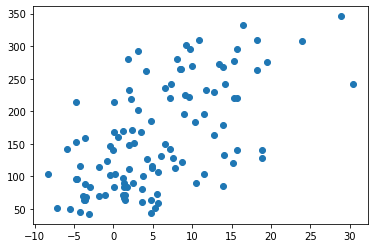

In [22]:
plt.scatter(y_predicted,Y_test)

In [23]:
Y_test,y_predicted

(         0
 230  220.0
 93    96.0
 36   265.0
 146  178.0
 159  195.0
 ..     ...
 158   96.0
 266   45.0
 390  277.0
 382  132.0
 435   64.0
 
 [111 rows x 1 columns],
            bmi
 230  15.628549
 93   -4.561078
 36    8.417968
 146  13.865962
 159  11.462435
 ..         ...
 158  -4.721314
 266  -4.240608
 390  15.308078
 382  14.026197
 435   1.527857
 
 [111 rows x 1 columns])